In [1]:
# VIF检验的代码
def calulate_vif(df):
    X = df.copy(deep=True)
    # 一定要加上常数项，#如果没有常数项列，计算结果天差地别，可能VIF等于好几千
    X[X.shape[1]]=1
    #vif
    vif=[]
    for i in range(X.shape[1]-1):
        #计算第i+1个变量的(第i+1列)的方差膨胀因子
        vif.append(variance_inflation_factor(X.values,i))
    #result_out
    yy=pd.DataFrame(X.columns[:-1,])
    yy.rename(columns={0:"var_name"},inplace=True) 
    yy["vif"]=vif
    return yy

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# 打开特征文件
txt_path = r'→→muticoxMiddleRet_num20.txt'
featureL1 = pd.read_csv(txt_path,header=None)[0].tolist()
featureL_selected = []
for i in featureL1:
    featureL_selected.append(i.replace('.','-'))
    
print(f'有{len(featureL_selected)}个特征')

有20个特征


In [4]:
# 打开影像组学文件
file_path = r'radiomics1402_pretreated_OS.csv'
df_orig = pd.read_table(file_path,sep=',',index_col=0)

# 筛选一波
df_orig = df_orig[featureL_selected]

# 复制一份
df_tmp = df_orig.copy(deep=True)  # .iloc[:,2:]
df_tmp

,log-sigma-5-mm-3D_glcm_Idn,squareroot_firstorder_Median,lbp-3D-k_glrlm_ShortRunEmphasis,wavelet-LLH_glszm_GrayLevelNonUniformity,log-sigma-5-mm-3D_firstorder_90Percentile,wavelet-LHH_ngtdm_Contrast,square_glrlm_RunEntropy,wavelet-HLL_firstorder_Kurtosis,wavelet-HLL_glszm_SizeZoneNonUniformityNormalized,wavelet-LHL_glszm_ZoneEntropy,original_shape_MinorAxisLength,wavelet-LLH_firstorder_Mean,original_shape_Sphericity,wavelet-LLL_glcm_Idmn,wavelet-LHL_gldm_DependenceVariance,wavelet-HLL_gldm_DependenceVariance,log-sigma-3-mm-3D_glszm_ZoneEntropy,log-sigma-5-mm-3D_firstorder_Median,lbp-2D_firstorder_InterquartileRange,wavelet-LHH_gldm_DependenceNonUniformityNormalized
Subject,,,,,,,,,,,,,,,,,,,,
X0907236_ZhouJiSheng,0.978929,418.103580,0.419132,73.934508,13.716698,0.001638,4.957925,21.422334,0.197382,5.877973,56.688722,-1.006697,0.498970,0.998059,29.992383,33.763932,6.205362,-24.819478,2.5,0.104869
X0875917_LiYan,0.976438,469.206017,0.372534,48.381674,18.177860,0.000817,4.973058,15.557493,0.136481,7.213564,59.609625,-0.910070,0.662562,0.998251,33.161329,33.761676,6.552695,-29.572262,2.0,0.078167
TCGA-27-1830,0.976809,361.326537,0.392058,91.859655,-1.832864,0.003141,4.811214,13.737185,0.239300,6.468888,33.948305,-2.664174,0.616121,0.997026,28.714363,30.516095,5.870566,-48.545515,2.0,0.080178
TCGA-DU-5854,0.975821,378.441206,0.297715,13.598095,9.866241,0.001674,4.827622,22.605320,0.159176,5.824697,42.470084,-0.894696,0.663250,0.997674,27.613160,34.625264,5.097847,-20.290770,2.0,0.080079
HF1588,0.968646,389.782128,0.409873,52.251438,12.997869,0.019593,4.761555,15.583998,0.207264,4.973512,37.550941,-0.326498,0.531358,0.996102,25.230655,27.546266,5.379736,-40.516292,3.0,0.078900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X1052598_ShiHongMei,0.973971,545.344729,0.405578,66.154018,-6.453781,0.001158,5.066364,32.544928,0.263806,6.738089,51.721233,-1.941097,0.682478,0.998560,30.617479,34.898009,6.441233,-57.654155,3.0,0.085675
X0930877_XuPingLan,0.980352,496.023289,0.296317,31.711602,19.271812,0.010592,5.255231,12.117864,0.099305,6.991156,53.134315,-0.414315,0.613724,0.998826,33.895249,34.235136,6.592257,-24.207621,2.0,0.081979
TCGA-DU-6395,0.977762,416.562123,0.339940,437.999479,4.845201,0.002410,4.611289,20.043984,0.413163,4.848256,54.899323,-1.953735,0.373961,0.996877,33.189645,39.412890,4.749348,-26.371862,2.0,0.072793


# VIF检验

In [5]:
# 运行
vif_ret = calulate_vif(df_tmp)
vif_tmp_mean = vif_ret['vif'].mean()
print(f'平均VIF为{vif_tmp_mean}')

# # 注意！python运行VIF库时会自动把名字里的 - 变成 . ，所以最后还得变回去
# for i in range(len(vif_ret)):
#     old_str = vif_ret.iloc[i,0]
#     new_str = old_str.replace("-", ".")
#     vif_ret.iloc[i,0] = new_str

vif_ret

平均VIF为3.385868614291211


,var_name,vif
0,log-sigma-5-mm-3D_glcm_Idn,6.176969
1,squareroot_firstorder_Median,2.163299
2,lbp-3D-k_glrlm_ShortRunEmphasis,2.615566
3,wavelet-LLH_glszm_GrayLevelNonUniformity,1.940147
4,log-sigma-5-mm-3D_firstorder_90Percentile,4.461192
5,wavelet-LHH_ngtdm_Contrast,1.653135
6,square_glrlm_RunEntropy,2.558615
7,wavelet-HLL_firstorder_Kurtosis,1.584668
8,wavelet-HLL_glszm_SizeZoneNonUniformityNormalized,2.923782
9,wavelet-LHL_glszm_ZoneEntropy,2.772426


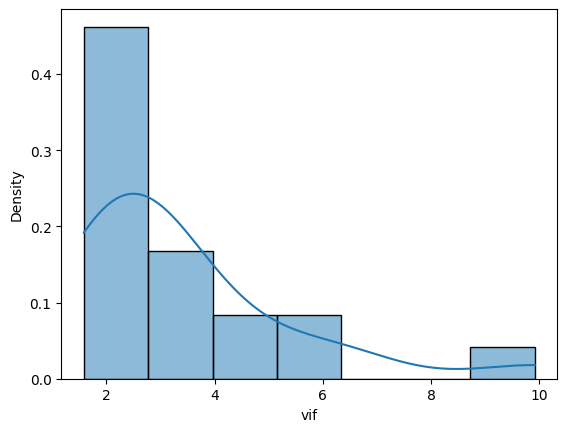

In [6]:
sns.histplot(vif_ret['vif'],kde=True, stat="density")  # , linewidth=1,bins=10
plt.show()

In [7]:
vif_save = '→→→VIF_'+txt_path.split('→')[-1][:-4]+'.csv'
vif_ret.to_csv(vif_save, index=False,header=True)

# 相关分析

In [105]:
# 相关系数
correlation=df_tmp.corr()
# correlation = correlation.sort_values(by="age", ascending=False)
correlation

,wavelet-HLL_glrlm_RunLengthNonUniformity,lbp-3D-m2_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformity,wavelet-LHL_glszm_SmallAreaEmphasis,log-sigma-5-mm-3D_firstorder_Mean,log-sigma-5-mm-3D_glcm_Idn,squareroot_firstorder_Median,lbp-3D-k_glrlm_ShortRunEmphasis,wavelet-LLH_glszm_GrayLevelNonUniformity,log-sigma-5-mm-3D_firstorder_90Percentile,...,wavelet-LLL_glszm_SizeZoneNonUniformityNormalized,lbp-2D_firstorder_InterquartileRange,gradient_gldm_GrayLevelVariance,wavelet-LLL_glszm_SmallAreaEmphasis,wavelet-LHH_gldm_DependenceNonUniformityNormalized,log-sigma-3-mm-3D_ngtdm_Busyness,wavelet-LLH_gldm_DependenceVariance,gradient_firstorder_Variance,logarithm_firstorder_10Percentile,log-sigma-5-mm-3D_glcm_Imc1
wavelet-HLL_glrlm_RunLengthNonUniformity,1.000000,0.857455,0.818784,-0.065677,0.380266,0.535395,0.121435,0.345502,0.494580,0.578774,...,0.041344,0.199524,-0.041854,0.061601,0.326018,0.440581,-0.133035,-0.040512,0.248835,-0.344630
lbp-3D-m2_glrlm_GrayLevelNonUniformity,0.857455,1.000000,0.934137,-0.083313,0.519292,0.668478,-0.039396,0.208779,0.472590,0.554893,...,-0.078253,0.076580,-0.230896,-0.058581,0.283298,0.617408,-0.143765,-0.221191,0.166659,-0.544538
original_glrlm_GrayLevelNonUniformity,0.818784,0.934137,1.000000,-0.128255,0.571296,0.688264,-0.183738,0.208333,0.457391,0.495016,...,-0.159951,0.140456,-0.318776,-0.141029,0.383303,0.722604,-0.202863,-0.307034,0.062252,-0.634364
wavelet-LHL_glszm_SmallAreaEmphasis,-0.065677,-0.083313,-0.128255,1.000000,-0.216123,-0.164517,0.166634,0.475734,0.182672,-0.151567,...,0.643634,-0.077966,0.456093,0.653737,-0.017847,-0.210786,0.146112,0.463633,0.134097,0.246148
log-sigma-5-mm-3D_firstorder_Mean,0.380266,0.519292,0.571296,-0.216123,1.000000,0.802968,-0.499326,0.211809,0.184924,0.713533,...,-0.364429,0.346194,-0.591048,-0.351149,0.340042,0.490897,-0.369576,-0.581452,-0.097237,-0.765958
log-sigma-5-mm-3D_glcm_Idn,0.535395,0.668478,0.688264,-0.164517,0.802968,1.000000,-0.247777,0.243992,0.262533,0.636253,...,-0.247272,0.278815,-0.437686,-0.231763,0.405489,0.480866,-0.326851,-0.424068,0.059603,-0.821793
squareroot_firstorder_Median,0.121435,-0.039396,-0.183738,0.166634,-0.499326,-0.247777,1.000000,0.004781,-0.006912,-0.095410,...,0.389119,-0.212749,0.475117,0.390146,-0.110706,-0.367380,0.154773,0.464014,0.782116,0.506246
lbp-3D-k_glrlm_ShortRunEmphasis,0.345502,0.208779,0.208333,0.475734,0.211809,0.243992,0.004781,1.000000,0.249043,0.230018,...,0.490486,0.482251,0.273855,0.500999,0.161122,0.001426,0.083947,0.285029,0.188392,-0.135602
wavelet-LLH_glszm_GrayLevelNonUniformity,0.494580,0.472590,0.457391,0.182672,0.184924,0.262533,-0.006912,0.249043,1.000000,0.312455,...,0.182755,-0.041700,0.080564,0.187095,0.259460,0.292900,-0.117076,0.083271,0.008060,-0.179720
log-sigma-5-mm-3D_firstorder_90Percentile,0.578774,0.554893,0.495016,-0.151567,0.713533,0.636253,-0.095410,0.230018,0.312455,1.000000,...,-0.097843,0.209977,-0.188094,-0.085714,0.221667,0.294368,-0.221139,-0.184263,0.088868,-0.515326


D:\Python_Projects\anaconda3\envs\pyradiomics\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

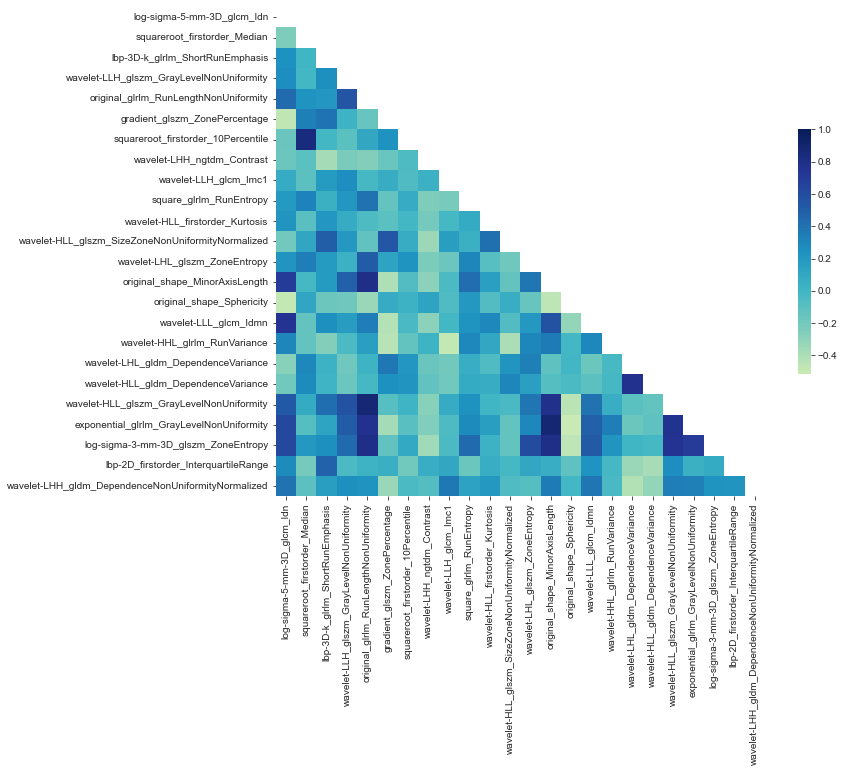

In [82]:
mask = np.zeros_like(correlation, dtype=np.bool)   #定义一个大小一致全为零的矩阵  用布尔类型覆盖原来的类型
mask[np.triu_indices_from(mask)]= True      #返回矩阵的上三角，并将其设置为true

# 相关性热图
sns.set_style("ticks")
plt.subplots(figsize=(12,9))
sns.heatmap(correlation,
            mask=mask,
            vmax=1,
            center=0,
            cmap="YlGnBu",
            square=True,
            cbar_kws={"shrink": .5},  # 右边的图例大小
           annot=False,   # 底图带数字
           
           )

# 删除极度相关元素

In [106]:
# 相关性分析
method = 'spearman'  # method : {'pearson', 'spearman', 'kendall'}  # 选择方法

coor = []
for i in df_tmp.columns:
    for j in df_tmp.columns:
        df_1 = df_tmp[i].values
        df_2 = df_tmp[j].values

        # 选择方法进行计算
        if method == 'pearson':
            r, p = stats.pearsonr(df_1, df_2)
        elif method == 'spearman':
            r, p = stats.spearmanr(df_1, df_2, nan_policy='omit')
        elif method == 'kendall':
            r, p = stats.kendalltau(df_1, df_2, nan_policy='omit')
        else:
            print("method方法选择错误")

        coor.append([i, j, r, p])
    
    
    
df_corr = pd.DataFrame(coor, columns=["Var_1", "Var_2", "R", "P"])
df_corr

# # 保存计算结果
# df_corr.to_csv(r'相关分析结果.csv', index=False)
# print('finish.')



####################
# 新添一列
####################
coor_version2 = []
for i in range(len(coor)):
    NameIndexCol = [coor[i][0],coor[i][1]]
    NameIndexCol.sort()  
    
    coor_version2.append([str(NameIndexCol),coor[i][0],coor[i][1],coor[i][2],coor[i][3]])

df_corr = pd.DataFrame(coor_version2, columns=["NameIndexCol","Var_1", "Var_2", "R", "P"])

####################
# 删除自己跟自己比的行
####################
del_list = []
for i in df_corr.index:
    if str(df_corr.loc[i,'Var_1']) != str(df_corr.loc[i,'Var_2']):
        del_list.append(i)
df_corr = df_corr.T[del_list].T

####################
# 保留上一个重复行，删除下一个重复行
####################
df_corr = df_corr.drop_duplicates('NameIndexCol',keep = 'last', inplace = False)
df_corr

,NameIndexCol,Var_1,Var_2,R,P
52,"['lbp-3D-m2_glrlm_GrayLevelNonUniformity', 'wa...",lbp-3D-m2_glrlm_GrayLevelNonUniformity,wavelet-HLL_glrlm_RunLengthNonUniformity,0.902717,0.0
104,"['original_glrlm_GrayLevelNonUniformity', 'wav...",original_glrlm_GrayLevelNonUniformity,wavelet-HLL_glrlm_RunLengthNonUniformity,0.858742,0.0
105,"['lbp-3D-m2_glrlm_GrayLevelNonUniformity', 'or...",original_glrlm_GrayLevelNonUniformity,lbp-3D-m2_glrlm_GrayLevelNonUniformity,0.951735,0.0
156,"['wavelet-HLL_glrlm_RunLengthNonUniformity', '...",wavelet-LHL_glszm_SmallAreaEmphasis,wavelet-HLL_glrlm_RunLengthNonUniformity,-0.095139,0.014113
157,"['lbp-3D-m2_glrlm_GrayLevelNonUniformity', 'wa...",wavelet-LHL_glszm_SmallAreaEmphasis,lbp-3D-m2_glrlm_GrayLevelNonUniformity,-0.119926,0.001948
...,...,...,...,...,...
2698,"['log-sigma-5-mm-3D_glcm_Imc1', 'wavelet-LHH_g...",log-sigma-5-mm-3D_glcm_Imc1,wavelet-LHH_gldm_DependenceNonUniformityNormal...,-0.376478,0.0
2699,"['log-sigma-3-mm-3D_ngtdm_Busyness', 'log-sigm...",log-sigma-5-mm-3D_glcm_Imc1,log-sigma-3-mm-3D_ngtdm_Busyness,-0.6731,0.0
2700,"['log-sigma-5-mm-3D_glcm_Imc1', 'wavelet-LLH_g...",log-sigma-5-mm-3D_glcm_Imc1,wavelet-LLH_gldm_DependenceVariance,0.272065,0.0
2701,"['gradient_firstorder_Variance', 'log-sigma-5-...",log-sigma-5-mm-3D_glcm_Imc1,gradient_firstorder_Variance,0.635081,0.0


In [112]:
# 筛选
# ★★★★★★★★★★
p_threshold = 0.05
coor_threshold = 0.90
# ★★★★★★★★★★


selected_id = []
for i in df_corr.index:
    R_value = df_corr.loc[i,'R']
    P_value = df_corr.loc[i,'P']
    if (R_value>coor_threshold or R_value<coor_threshold*-1) and P_value<coor_threshold:
        selected_id.append(i)

df_corr_selected = df_corr.T[selected_id].T
df_corr_selected

,NameIndexCol,Var_1,Var_2,R,P
52,"['lbp-3D-m2_glrlm_GrayLevelNonUniformity', 'wa...",lbp-3D-m2_glrlm_GrayLevelNonUniformity,wavelet-HLL_glrlm_RunLengthNonUniformity,0.902717,0.0
105,"['lbp-3D-m2_glrlm_GrayLevelNonUniformity', 'or...",original_glrlm_GrayLevelNonUniformity,lbp-3D-m2_glrlm_GrayLevelNonUniformity,0.951735,0.0
520,"['logarithm_glrlm_GrayLevelNonUniformity', 'wa...",logarithm_glrlm_GrayLevelNonUniformity,wavelet-HLL_glrlm_RunLengthNonUniformity,0.907424,0.0
521,"['lbp-3D-m2_glrlm_GrayLevelNonUniformity', 'lo...",logarithm_glrlm_GrayLevelNonUniformity,lbp-3D-m2_glrlm_GrayLevelNonUniformity,0.969104,0.0
522,"['logarithm_glrlm_GrayLevelNonUniformity', 'or...",logarithm_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformity,0.985676,0.0
576,"['log-sigma-5-mm-3D_firstorder_10Percentile', ...",log-sigma-5-mm-3D_firstorder_10Percentile,log-sigma-5-mm-3D_firstorder_Mean,0.906924,0.0
728,"['original_glrlm_RunLengthNonUniformity', 'wav...",original_glrlm_RunLengthNonUniformity,wavelet-HLL_glrlm_RunLengthNonUniformity,0.947273,0.0
786,"['squareroot_firstorder_10Percentile', 'square...",squareroot_firstorder_10Percentile,squareroot_firstorder_Median,0.913448,0.0
1043,['wavelet-LHL_glszm_SizeZoneNonUniformityNorma...,wavelet-LHL_glszm_SizeZoneNonUniformityNormalized,wavelet-LHL_glszm_SmallAreaEmphasis,0.997392,0.0
1109,"['wavelet-LLH_glszm_LargeAreaEmphasis', 'wavel...",wavelet-LLH_glszm_LargeAreaEmphasis,wavelet-LLH_glszm_ZoneVariance,0.999942,0.0


# 得到删除后的名单

In [113]:
# 所有待删配对的列表
LLLL = [] 
# 原始的所有特征
orig_feature = df_tmp.columns.tolist()
# 待删特征列表
final_delete = []

for i in range(len(df_corr_selected)):
    Var_1 = df_corr_selected.iloc[i,1]
    Var_2 = df_corr_selected.iloc[i,2]
    Var_1_vif = vif_ret.set_index('var_name').loc[Var_1,'vif']
    Var_2_vif = vif_ret.set_index('var_name').loc[Var_2,'vif']
    
    LLLL.append([Var_1,Var_1_vif,Var_2,Var_2_vif])
    
    # 把vif大的那个加入待删列表
    if Var_1_vif>=Var_2_vif:
        final_delete.append(Var_1)
    else:
        final_delete.append(Var_2)

final_delete = list(set(final_delete))
feature_final = list(set(orig_feature)-set(final_delete))

print(f'原来的特征有{len(orig_feature)}个，剩下{len(feature_final)}个，待删{len(final_delete)}个')
print(final_delete)

print('\n特征与VIF配对的信息')
LLLL

# orig_feature
# vif_ret

原来的特征有52个，剩下35个，待删17个
['log-sigma-5-mm-3D_firstorder_10Percentile', 'wavelet-HLL_glrlm_RunLengthNonUniformity', 'lbp-3D-m2_glrlm_GrayLevelNonUniformity', 'original_glrlm_GrayLevelNonUniformity', 'log-sigma-3-mm-3D_firstorder_RootMeanSquared', 'wavelet-LLL_glszm_SmallAreaEmphasis', 'original_glrlm_RunLengthNonUniformity', 'gradient_firstorder_Variance', 'original_shape_SurfaceArea', 'squareroot_firstorder_RootMeanSquared', 'wavelet-HLL_gldm_DependenceNonUniformity', 'wavelet-LHL_glszm_SmallAreaEmphasis', 'log-sigma-5-mm-3D_firstorder_Mean', 'squareroot_firstorder_Median', 'log-sigma-3-mm-3D_glrlm_GrayLevelNonUniformity', 'logarithm_glrlm_GrayLevelNonUniformity', 'wavelet-LLH_glszm_ZoneVariance']

特征与VIF配对的信息


[['lbp-3D-m2_glrlm_GrayLevelNonUniformity',
  12740.59844560834,
  'wavelet-HLL_glrlm_RunLengthNonUniformity',
  40.08606722028531],
 ['original_glrlm_GrayLevelNonUniformity',
  187.58686025681453,
  'lbp-3D-m2_glrlm_GrayLevelNonUniformity',
  12740.59844560834],
 ['logarithm_glrlm_GrayLevelNonUniformity',
  181.89685606908716,
  'wavelet-HLL_glrlm_RunLengthNonUniformity',
  40.08606722028531],
 ['logarithm_glrlm_GrayLevelNonUniformity',
  181.89685606908716,
  'lbp-3D-m2_glrlm_GrayLevelNonUniformity',
  12740.59844560834],
 ['logarithm_glrlm_GrayLevelNonUniformity',
  181.89685606908716,
  'original_glrlm_GrayLevelNonUniformity',
  187.58686025681453],
 ['log-sigma-5-mm-3D_firstorder_10Percentile',
  265.3288965925495,
  'log-sigma-5-mm-3D_firstorder_Mean',
  1697.5821372931343],
 ['original_glrlm_RunLengthNonUniformity',
  53.1821063353584,
  'wavelet-HLL_glrlm_RunLengthNonUniformity',
  40.08606722028531],
 ['squareroot_firstorder_10Percentile',
  48.26152255793192,
  'squareroot_fi

In [114]:
# 正儿八经开始删除
df_processed = df_tmp[feature_final]
for i in featureL1:
    featureL_selected.append(i.replace('.','-'))
    
df_processed

,log-sigma-5-mm-3D_glrlm_ShortRunEmphasis,log-sigma-3-mm-3D_ngtdm_Busyness,wavelet-HHL_glrlm_RunVariance,wavelet-LHH_ngtdm_Contrast,wavelet-HLL_glszm_SizeZoneNonUniformityNormalized,wavelet-LHH_gldm_DependenceNonUniformityNormalized,logarithm_firstorder_10Percentile,wavelet-LHL_glszm_SizeZoneNonUniformityNormalized,log-sigma-3-mm-3D_glszm_ZoneEntropy,lbp-3D-k_glrlm_ShortRunEmphasis,...,log-sigma-5-mm-3D_glcm_Idn,wavelet-HLL_glszm_GrayLevelNonUniformity,log-sigma-3-mm-3D_firstorder_10Percentile,gradient_gldm_GrayLevelVariance,squareroot_firstorder_10Percentile,log-sigma-5-mm-3D_firstorder_90Percentile,gradient_glrlm_GrayLevelVariance,wavelet-HLL_firstorder_Kurtosis,wavelet-LLH_glszm_GrayLevelNonUniformity,wavelet-LLL_firstorder_Median
Subject,,,,,,,,,,,,,,,,,,,,,
X0907236_ZhouJiSheng,0.324886,102.813872,1.609277,0.001638,0.197382,0.104869,542.207547,0.268149,6.205362,0.419132,...,0.978929,252.422141,-47.252086,0.674174,349.490205,13.716698,1.591968,21.422334,73.934508,723.944067
X0875917_LiYan,0.343995,68.148026,4.275186,0.000817,0.136481,0.078167,640.433143,0.130271,6.552695,0.372534,...,0.976438,239.123695,-58.935494,0.781836,387.839548,18.177860,1.293096,15.557493,48.381674,753.307906
TCGA-27-1830,0.452678,4.507124,2.301794,0.003141,0.239300,0.080178,491.505342,0.157566,5.870566,0.392058,...,0.976809,92.400844,-71.652031,1.821070,315.513909,-1.832864,2.478072,13.737185,91.859655,591.888828
TCGA-DU-5854,0.309382,43.776214,3.858176,0.001674,0.159176,0.080079,475.002399,0.146057,5.097847,0.297715,...,0.975821,48.067429,-47.735714,0.283062,344.594084,9.866241,0.810878,22.605320,13.598095,721.835164
HF1588,0.393766,39.098917,2.403520,0.019593,0.207264,0.078900,526.932620,0.204327,5.379736,0.409873,...,0.968646,100.641752,-67.085524,0.353011,355.348030,12.997869,0.579354,15.583998,52.251438,665.928128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X1052598_ShiHongMei,0.461888,22.213345,2.718243,0.001158,0.263806,0.085675,675.995162,0.199591,6.441233,0.405578,...,0.973971,209.302589,-85.914263,1.797324,459.557531,-6.453781,3.216198,32.544928,66.154018,1031.024955
X0930877_XuPingLan,0.400057,25.350458,3.712766,0.010592,0.099305,0.081979,678.326796,0.113460,6.592257,0.296317,...,0.980352,134.067616,-61.456432,0.665594,413.219002,19.271812,1.070800,12.117864,31.711602,801.519259
TCGA-DU-6395,0.399612,48.601625,2.810814,0.002410,0.413163,0.072793,559.653127,0.427352,4.749348,0.339940,...,0.977762,341.134489,-61.009877,0.552277,375.888864,4.845201,0.834356,20.043984,437.999479,715.507906


In [115]:
featureL_processed = []
for i in df_processed.columns:
    featureL_processed.append(i.replace('-','.'))

# 保存去除高相关性后的特征们
save_nammme = '→→jupyter降低相关性'+'p'+str(p_threshold)+'r'+str(coor_threshold)+'_num'+str(len(df_processed.columns))+'.txt'
save_nammme

'→→jupyter降低相关性p0.05r0.9_num35.txt'

In [116]:
pd.DataFrame(featureL_processed).to_csv(save_nammme, index=False,header=None)